In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0     

In [4]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory
new_base_dir = "dataset"
train_dataset = image_dataset_from_directory(
    new_base_dir + "/train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir + "/validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir + "/test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2001 files belonging to 2 classes.


In [6]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 5s 32ms/step - loss: 0.7458 - accuracy: 0.5125 - val_loss: 0.6903 - val_accuracy: 0.5140
Epoch 2/100
63/63 [==============================] - 2s 27ms/step - loss: 0.7003 - accuracy: 0.5525 - val_loss: 0.6851 - val_accuracy: 0.5360
Epoch 3/100
63/63 [==============================] - 2s 25ms/step - loss: 0.6907 - accuracy: 0.5575 - val_loss: 0.6786 - val_accuracy: 0.5570
Epoch 4/100
63/63 [==============================] - 2s 25ms/step - loss: 0.6835 - accuracy: 0.5885 - val_loss: 0.6158 - val_accuracy: 0.6630
Epoch 5/100
63/63 [==============================] - 2s 25ms/step - loss: 0.7435 - accuracy: 0.6320 - val_loss: 0.8162 - val_accuracy: 0.5820
Epoch 6/100
63/63 [==============================] - 2s 25ms/step - loss: 0.6307 - accuracy: 0.6415 - val_loss: 0.6833 - val_accuracy: 0.5730
Epoch 7/100
63/63 [==============================] - 2s 26ms/step - loss: 0.6141 - accuracy: 0.6610 - val_loss: 1.3816 - val_accuracy: 0.5470
Epoch 

KeyboardInterrupt: 

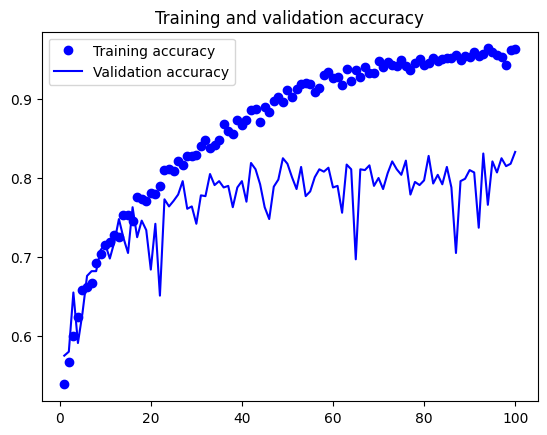

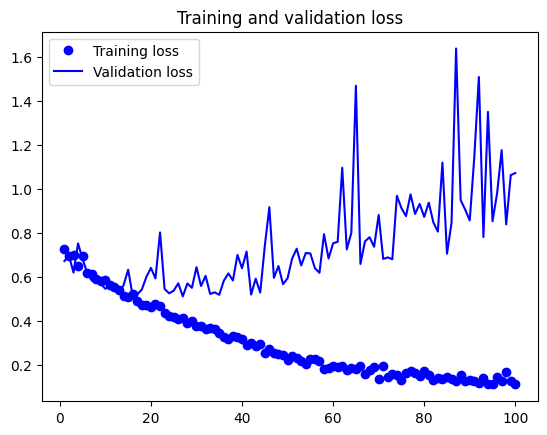

In [74]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [76]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 13ms/step - loss: 0.5272 - accuracy: 0.7711
Test accuracy: 0.771


In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [13]:
ds = iter(train_dataset)

In [24]:
img = ds.next()

In [15]:
import matplotlib.pyplot as plt

In [47]:
simg = img[0][0] / 255.0

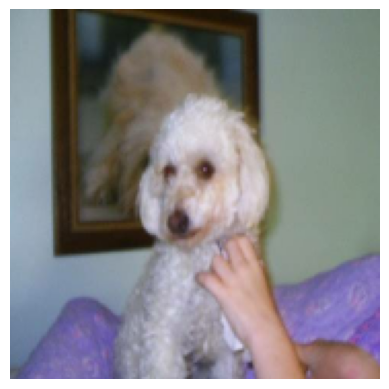

In [48]:
# 显示图像
plt.imshow(simg, origin='upper')
plt.axis('off')
plt.show()